## KNN 介绍

### 算法介绍

kNN算法的核心思想是如果一个样本在特征空间中的k个最相邻的样本中的大多数属于某一个类别，则该样本也属于这个类别，并具有这个类别上样本的特性。该方法在确定分类决策上只依据最邻近的一个或者几个样本的类别来决定待分样本所属的类别。 kNN方法在类别决策时，只与极少量的相邻样本有关。由于kNN方法主要靠周围有限的邻近的样本，而不是靠判别类域的方法来确定所属类别的，因此对于类域的交叉或重叠较多的待分样本集来说，kNN方法较其他方法更为适合。

### 向量距离

#### 向量的距离：

两个向量之间的距离（此时向量作为n维向量坐标系中的点）计算，在数学上称为向量的距离（Distance），也称为样本之间的相似性度量（Similarity Measurement）。它反映为某类事物在距离上接近或远离的程度。直觉上，距离越近，越容易归为一类；距离越远就越不同。划分的依据，称为距离。

#### 各种向量的距离和实际的含义

1.欧式距离

初中普及的两点之间的距离(勾股定理)的定义的扩展

2.曼哈顿距离

曼哈顿距离也称城市街区距离（City Block Distance）,也就是L1范数。
二维平面两点A(x1,y1)和B(x2,y2)间的曼哈顿距离为：
d=|x2-x1|+|y2-y1|

3.切比雪夫距离

国际象棋中，国王每走一步能够走到相邻的8个方格中的任意一个，那么国王从A(x1,y1)走到B(x2,y2)最少需要多少步？

4.夹角余弦

二维坐标系中的两条直线之间的夹角余弦值的扩展

5.汉明距离

两个字符串s1和s2之间的汉明距离 定义为将其中一个变为另外一个所需要的最小替换次数。

6.杰卡德相似系数

两个集合A和B的交集元素在A、B的并集中所占的比率，称为两个集合的杰卡德相似系数。


### K 值的确定

1. 经验确定
2. 交叉验证，取在测试集上取不同的k值



##  数据准备

#### 1.数据集生成

php 生成了随机扭转和偏移的 0-9 数字，各20张，40*60像素 ，取一半作为训练数据集，一半作为测试数据集，格式如下：

<img src="../data/1_0.png" style="display:inline"><img src="../data/2_3.png" style="display:inline">
<img src="../data/9_3.png" style="display:inline"><img src="../data/8_3.png" style="display:inline">

#### 2. 二值化，向量化

将图片中的像素点分为两类（本例中比较简单，无需技巧，一般的处理技巧是：），然后转成二进制一维向量(2400长度)，如下

示例图片


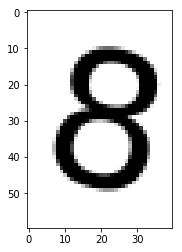

000000000000000000000000000000000000000
000000000000000000000000000000000000000
000000000000000000000000000000000000000
000000000000000000000000000000000000000
000000000000000000000000000000000000000
000000000000000000000000000000000000000
000000000000000000000000000000000000000
000000000000000000000000000000000000000
000000000000000000000000000000000000000
000000000000000000000000000000000000000
000000000000000000111111111000000000000
000000000000000011111111111111000000000
000000000000000111111111111111110000000
000000000000001111111111111111111000000
000000000000011111111111111111111100000
000000000000111111111000001111111110000
000000000000111111100000000011111111000
000000000000111111000000000001111111000
000000000000111111000000000000111111000
000000000000111111000000000000111111100
000000000000111111000000000000011111100
000000000000111111000000000000111111100
000000000000111111000000000000111111000
000000000000011111100000000000111111000
000000000000011111110000000001111111000


In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def showPic( filename ):
    img=np.array(Image.open(filename))
    plt.imshow(img)
    plt.axis('on')
    plt.show()
def getPngStr(filename):
    image = Image.open(filename)
    r, g, b = image.split()
    r_arr = np.array(r).reshape(2400)
    ##print r_arr.size
    retStr=""
    for row in r_arr:
        if row < 255 :
            retStr+="1"
        else :
            retStr+="0"
    return retStr

demo="../data/8_2.png"
print "示例图片"
showPic(demo)
demoStr = getPngStr(demo)
i = 0
while i < 60 :
    #print i
    print demoStr[i*40:(i+1)*40 - 1]
    i+=1


### 交叉验证

交叉验证的目的是，通过测试 测试集 在训练集上的效果来确定 K 的值和选取的距离函数

### KNN python 实现

1. 给定 K 值
2. 分别计算 输入向量 到 100 个测试向量的值，按照距离，从小到大排序
3. 取前 K 个值，出现最多的值就是预测的数字




In [2]:
# 定义一些工具函数
# 主要是各种距离的实现，下面会用到

import scipy.spatial.distance as dist #导入Scipy距离公式

# str to np_array
def strToNPArr(str1 , str2) :
    return np.array([int(i) for i in list(str1)]) , np.array([int(i) for i in list(str2)])

# str to array
def strToArr(str1 , str2) :
    return [int(i) for i in list(str1)] , [int(i) for i in list(str2)]

# 欧式距离
def calEuclideanDistance(strVec1,strVec2) :
    vec1 , vec2 = strToNPArr(strVec1 , strVec2)
    dist = np.linalg.norm(vec1 - vec2)
    return dist  

# 曼哈顿距离
def calMhdDistance(strVec1 , strVec2):
    vec1 , vec2 = strToNPArr(strVec1 , strVec2)
    return np.sum(np.abs(vec1 - vec2))

# 切比雪夫距离
def calChebyshewDictance(strVec1 , strVec2) :
    vec1 , vec2 = strToNPArr(strVec1 , strVec2)
    return np.abs(vec1 - vec2).max()

# 余弦相似度
def calConsinDistance(strVec1 , strVec2) :
    vec1 , vec2 = strToNPArr(strVec1 , strVec2)
    return np.dot(vec1,vec2)/(np.linalg.norm(vec1)*np.linalg.norm(vec2))

# 汉明距离
def calHammingDistance(strVec1 , strVec2) :
    vec1 , vec2 = strToNPArr(strVec1 , strVec2)
    r = (1 << np.arange(8))[:,None]
    return np.count_nonzero( (vec1 & r) != (vec2 & r) )


# 杰卡德距离
def calJaccardDistance(strVec1 , strVec2) :
    vec1 , vec2 = strToNPArr(strVec1 , strVec2)
    matV = np.mat([vec1 , vec2])
    return dist.pdist(matV  , "jaccard")




K 值的确定主要通过交叉验证来确定
这里分别使用 100 个测试集来在不同的距离函数上确定合适的 K 值
经验上，通常k小于数据集的平方根。

In [3]:
import time
inputfile = "../data/test/binarytxt/9_4.txt"
# 读取数据
testDict = {}
trainDict = {}
i=9
while i >=0 :
    j=9
    while j >= 0:
        txtFile = '../data/binarytxt/'+str(i)+"_"+str(j)+".txt"
        file = open(txtFile ,"r+")
        trainStr = file.read()
        trainDict[str(i)+"_"+str(j)] = trainStr
        txtFile = "../data/test/binarytxt/"+str(i)+"_"+str(j)+".txt"
        file = open(txtFile ,"r+")
        testStr = file.read()
        testDict[str(i)+"_"+str(j)] = testStr
        j-=1
    i-=1

    
def getPredictNumWithEuclidean(prStr , trainDict , k) :
    retDict = {}
    dis = {}
    for trainK in trainDict :
        trainV = trainDict[trainK]
        dis[trainK] = calEuclideanDistance(prStr , trainV)
    dis = sorted(dis.iteritems(), key=lambda d:d[1], reverse = False)
    dis = dis[0:k]
    for disK in dis :
        pk = disK[0].split("_")[0]
        if retDict.has_key(pk) :
            retDict[pk] = retDict[pk] + 1
        else :
            retDict[pk] = 1
    retDict = sorted(retDict.iteritems(), key=lambda d:d[1], reverse = True)
    if len(retDict) > 0 :
        return retDict[0][0]
    else :
        return False
    
    
def getPredictNumWithMhd(prStr , trainDict , k) :
    retDict = {}
    dis = {}
    for trainK in trainDict :
        trainV = trainDict[trainK]
        dis[trainK] = calMhdDistance(prStr , trainV)
    dis = sorted(dis.iteritems(), key=lambda d:d[1], reverse = False)
    dis = dis[0:k]
    for disK in dis :
        pk = disK[0].split("_")[0]
        if retDict.has_key(pk) :
            retDict[pk] = retDict[pk] + 1
        else :
            retDict[pk] = 1
    retDict = sorted(retDict.iteritems(), key=lambda d:d[1], reverse = True)
    if len(retDict) > 0 :
        return retDict[0][0]
    else :
        return False
    
def getPredictNumWithConsin(prStr , trainDict , k) :
    retDict = {}
    dis = {}
    for trainK in trainDict :
        trainV = trainDict[trainK]
        dis[trainK] = calConsinDistance(prStr , trainV)
    dis = sorted(dis.iteritems(), key=lambda d:d[1], reverse = False)
    dis = dis[0:k]
    for disK in dis :
        pk = disK[0].split("_")[0]
        if retDict.has_key(pk) :
            retDict[pk] = retDict[pk] + 1
        else :
            retDict[pk] = 1
    retDict = sorted(retDict.iteritems(), key=lambda d:d[1], reverse = True)
    if len(retDict) > 0 :
        return retDict[0][0]
    else :
        return False
    
    
# 汉明距离
def getPredictNumWithHamming(prStr , trainDict , k) :
    retDict = {}
    dis = {}
    for trainK in trainDict :
        trainV = trainDict[trainK]
        dis[trainK] = calHammingDistance(prStr , trainV)
    dis = sorted(dis.iteritems(), key=lambda d:d[1], reverse = False)
    dis = dis[0:k]
    for disK in dis :
        pk = disK[0].split("_")[0]
        if retDict.has_key(pk) :
            retDict[pk] = retDict[pk] + 1
        else :
            retDict[pk] = 1
    retDict = sorted(retDict.iteritems(), key=lambda d:d[1], reverse = True)
    if len(retDict) > 0 :
        return retDict[0][0]
    else :
        return False

def getPredictNumWithCheby(prStr , trainDict , k) :
    retDict = {}
    dis = {}
    for trainK in trainDict :
        trainV = trainDict[trainK]
        dis[trainK] = calChebyshewDictance(prStr , trainV)
    dis = sorted(dis.iteritems(), key=lambda d:d[1], reverse = False)
    dis = dis[0:k]
    for disK in dis :
        pk = disK[0].split("_")[0]
        if retDict.has_key(pk) :
            retDict[pk] = retDict[pk] + 1
        else :
            retDict[pk] = 1
    retDict = sorted(retDict.iteritems(), key=lambda d:d[1], reverse = True)
    if len(retDict) > 0 :
        return retDict[0][0]
    else :
        return False
    
def getPredictNumWithJaccard(prStr , trainDict , k) :
    retDict = {}
    dis = {}
    for trainK in trainDict :
        trainV = trainDict[trainK]
        dis[trainK] = calJaccardDistance(prStr , trainV)
    dis = sorted(dis.iteritems(), key=lambda d:d[1], reverse = False)
    dis = dis[0:k]
    for disK in dis :
        pk = disK[0].split("_")[0]
        if retDict.has_key(pk) :
            retDict[pk] = retDict[pk] + 1
        else :
            retDict[pk] = 1
    retDict = sorted(retDict.iteritems(), key=lambda d:d[1], reverse = True)
    if len(retDict) > 0 :
        return retDict[0][0]
    else :
        return False

下面就是分别使用上面讲的几种距离计算方式分别在K 值是 1~20 这个区间的准确度，来得到一个对应距离准确率最好的 K 值

In [22]:
funcList = ["Euclidean","Mhd","Consin","Hamming","Cheby","Jaccard"]
for line in funcList :
    fun = "getPredictNumWith"+line
    print fun
    kStart = 1
    kMax  = 20
    start = time.clock()
    kToRateDict = {}
    while kStart <= kMax :
        rightRate = 0
        for testK in testDict :
            testV = testDict[testK]
            tpk   = testK[0].split("_")[0]
            pRet  = eval(fun)(testV , trainDict , kStart)
            if pRet == tpk :
                rightRate = rightRate + 1
        kToRateDict[kStart] = rightRate
        kStart = kStart + 1
    end = time.clock()
    print end - start
    print kToRateDict

getPredictNumWithEuclidean
505.27
{1: 99, 2: 94, 3: 88, 4: 80, 5: 81, 6: 74, 7: 66, 8: 58, 9: 57, 10: 58, 11: 58, 12: 53, 13: 49, 14: 45, 15: 41, 16: 42, 17: 42, 18: 42, 19: 40, 20: 36}
getPredictNumWithMhd
504.57
{1: 99, 2: 94, 3: 88, 4: 80, 5: 81, 6: 74, 7: 66, 8: 58, 9: 57, 10: 58, 11: 58, 12: 53, 13: 49, 14: 45, 15: 41, 16: 42, 17: 42, 18: 42, 19: 40, 20: 36}
getPredictNumWithConsin
506.84
{1: 11, 2: 16, 3: 16, 4: 16, 5: 18, 6: 16, 7: 17, 8: 12, 9: 14, 10: 15, 11: 13, 12: 15, 13: 15, 14: 15, 15: 14, 16: 14, 17: 14, 18: 15, 19: 15, 20: 14}
getPredictNumWithHamming
519.62
{1: 99, 2: 94, 3: 88, 4: 80, 5: 81, 6: 74, 7: 66, 8: 58, 9: 57, 10: 58, 11: 58, 12: 53, 13: 49, 14: 45, 15: 41, 16: 42, 17: 42, 18: 42, 19: 40, 20: 36}
getPredictNumWithCheby
504.95
{1: 59, 2: 24, 3: 20, 4: 13, 5: 11, 6: 10, 7: 10, 8: 10, 9: 10, 10: 10, 11: 10, 12: 10, 13: 12, 14: 12, 15: 11, 16: 11, 17: 10, 18: 11, 19: 11, 20: 11}
getPredictNumWithJaccard
511.1
{1: 97, 2: 95, 3: 83, 4: 79, 5: 76, 6: 77, 7: 70, 8: 7

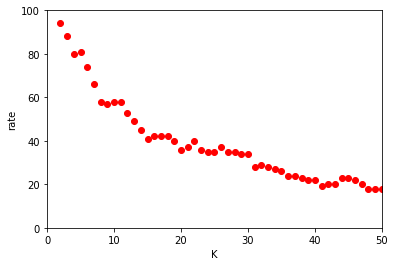

In [4]:
kToRateDict = {2: 94, 3: 88, 4: 80, 5: 81, 6: 74, 7: 66, 8: 58, 9: 57, 10: 58, 11: 58, 12: 53, 13: 49, 14: 45, 15: 41, 16: 42, 17: 42, 18: 42, 19: 40, 20: 36, 21: 37, 22: 40, 23: 36, 24: 35, 25: 35, 26: 37, 27: 35, 28: 35, 29: 34, 30: 34, 31: 28, 32: 29, 33: 28, 34: 27, 35: 26, 36: 24, 37: 24, 38: 23, 39: 22, 40: 22, 41: 19, 42: 20, 43: 20, 44: 23, 45: 23, 46: 22, 47: 20, 48: 18, 49: 18, 50: 18}
# 绘制上面交叉验证后的 k 和 正确率的 关系 图
k = kToRateDict.keys()
v = kToRateDict.values()
plt.plot(k , v  ,'ro')
plt.axis([0, 50, 0, 100])
plt.ylabel('rate')
plt.xlabel('K')
plt.show()


测试图片


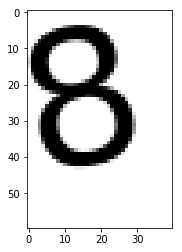

预测结果:
8


In [8]:
import commands
(status, output) = commands.getstatusoutput("php ../rand.php")
demo="../data/rand/rand.png"
print "测试图片"
showPic(demo)
demoStr = getPngStr(demo)
i = 0
print "预测结果:"
print getPredictNumWithJaccard(demoStr , trainDict , 2)
